# Importing Libraries

In [1]:
#importing the libraries
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score ,classification_report


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(8, 6), dpi=80,)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# Upload Dataset

In [2]:
#reading the dataset
directory = "D:/DEBI/Uottawa/Smart Cities/project/"
MCS_dataset = pd.read_csv(directory+'MCSDatasetNEXTCONLab.csv')
MCS_dataset.head(20)

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
5,2,45.447747,-75.147951,2,15,59,30,20,5,47,0,140784,1
6,2,45.447790,-75.148303,2,16,9,30,10,5,47,0,140784,1
7,3,45.508896,-75.259807,2,12,27,30,30,4,43,0,243994,1
8,3,45.508748,-75.260652,2,12,37,30,20,4,43,0,243994,1
9,3,45.508082,-75.260380,2,12,47,30,10,4,43,0,243994,1


In [4]:
y_target=MCS_dataset['Ligitimacy']
# remove the ID and Ligitimacy columns
X_data=MCS_dataset.iloc[:,1:-1]
X_data.head()

,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380
1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380
2,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996
3,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996
4,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784


In [5]:
y_target.value_counts()


1    12587
0     1897
Name: Ligitimacy, dtype: int64

## Data Scaling

In [7]:
# standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_data)
data_scaled

array([[-0.71020988, -1.57371219, -0.88823172, ...,  1.26573362,
        -0.47299496, -0.66533822],
       [-0.71000221, -1.59200248, -0.88823172, ...,  1.26573362,
        -0.47299496, -0.66533822],
       [-0.71084985, -1.58461158, -0.88823172, ...,  1.26573362,
        -0.47299496, -0.75761714],
       ...,
       [-0.80277162,  1.19609836, -1.47493129, ..., -0.11285653,
        -0.47299496, -0.7574303 ],
       [-0.79775666,  1.18029048, -1.47493129, ..., -0.11285653,
        -0.47299496, -0.7574303 ],
       [-0.79766935,  1.18098113, -1.47493129, ..., -0.11285653,
        -0.47299496, -0.7574303 ]])

## 2. Split the dataset into training dataset (80%) and test dataset (20%)

In [8]:
# Split dataset into 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y_target, test_size=0.2,random_state=0)  

In [9]:
# To verify the split
print("shape of original dataset :", MCS_dataset.shape)
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (14484, 13)
shape of input - training set (11587, 11)
shape of output - training set (11587,)
shape of input - testing set (2897, 11)
shape of output - testing set (2897,)


# Implement classic classifiers (Adaboost and RF) and Train

1. RF

In [10]:
# RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train) 

#Predict using the test set
pred_RF_base = RF.predict(X_test)

# Calculate Model Accuracy
Accuracy_RF_base= accuracy_score(y_test, pred_RF_base)
print("Test Accuracy of RF base = ",Accuracy_RF_base,"\n")
print(classification_report( y_test,pred_RF_base))

Test Accuracy of RF base =  0.9965481532619952 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       390
           1       1.00      1.00      1.00      2507

    accuracy                           1.00      2897
   macro avg       1.00      0.99      0.99      2897
weighted avg       1.00      1.00      1.00      2897



2.   AdaBoost (AB)

In [12]:
# AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost.fit(X_train, y_train)

# Predict the response for test dataset
pred_ADB_base = AdaBoost.predict(X_test)

# Calculate Model Accuracy 
Accuracy_ADB_base = accuracy_score(y_test, pred_ADB_base)
print("Test Accuracy of AdaBoost base = ",Accuracy_ADB_base,"\n")
print(classification_report( y_test,pred_ADB_base))


Test Accuracy of AdaBoost base =  0.9527096996893338 

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       390
           1       0.96      0.98      0.97      2507

    accuracy                           0.95      2897
   macro avg       0.92      0.87      0.89      2897
weighted avg       0.95      0.95      0.95      2897



# Verify detection performance using test dataset and present results comparison in bar chart

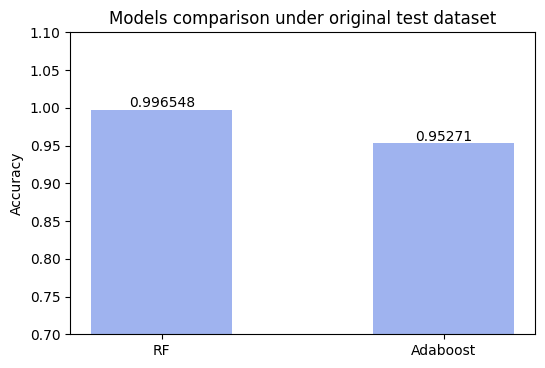

In [13]:
models_names = ['RF','Adaboost']
models_accuracies = [Accuracy_RF_base, Accuracy_ADB_base]
plt.figure(dpi=100)
bar = plt.bar(models_names ,models_accuracies, color= 'royalblue', align='center', alpha=0.5,width = 0.50)
plt.title('Models comparison under original test dataset')
plt.ylabel('Accuracy')
# plt.xticks(color = 'black',rotation = 45, horizontalalignment = 'right')
plt.bar_label(bar)
plt.ylim(0.7,1.1)
plt.show()

# CGAN

## Implement a CGAN model

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score,classification_report
from sklearn.model_selection import train_test_split

# import lightgbm as lgb
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, multiply
from tensorflow.keras.layers import BatchNormalization, Embedding, LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
from sklearn.utils import shuffle

np.random.seed(0)

In [15]:
class cGAN():   
    def __init__(self,latent_dim=32, out_shape=14):
        
        self.latent_dim = latent_dim
        self.out_shape = out_shape 
        self.num_classes = 2
        # using Adam as our optimizer
        optimizer = Adam(0.0002, 0.5)
        
        # building the discriminator
        self.discriminator = self.discriminator()
        self.discriminator.compile(loss=['binary_crossentropy'],
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        # building the generator
        self.generator = self.generator()

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        gen_samples = self.generator([noise, label])
        
        # we don't train discriminator when training generator
        self.discriminator.trainable = False
        valid = self.discriminator([gen_samples, label])

        # combining both models
        self.combined = Model([noise, label], valid)
        self.combined.compile(loss=['binary_crossentropy'],
                              optimizer=optimizer,
                             metrics=['accuracy'])
    def generator(self):
        init = RandomNormal(mean=0.0, stddev=0.02)
        model = Sequential()

        model.add(Dense(128, input_dim=self.latent_dim))
        model.add(Dropout(0.2))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(256))
        model.add(Dropout(0.2))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(512))
        model.add(Dropout(0.2))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(self.out_shape, activation='tanh'))

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.latent_dim)(label))
        
        model_input = multiply([noise, label_embedding])
        gen_sample = model(model_input)

        return Model([noise, label], gen_sample, name="Generator")

    
    def discriminator(self):
        init = RandomNormal(mean=0.0, stddev=0.02)
        model = Sequential()

        model.add(Dense(512, input_dim=self.out_shape, kernel_initializer=init))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Dense(256, kernel_initializer=init))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Dense(128, kernel_initializer=init))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Dense(1, activation='sigmoid'))
        
        gen_sample = Input(shape=(self.out_shape,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.out_shape)(label))

        model_input = multiply([gen_sample, label_embedding])
        validity = model(model_input)

        return Model(inputs=[gen_sample, label], outputs=validity, name="Discriminator")


    def train(self, X_train, y_train, pos_index, neg_index, epochs, sampling=False, batch_size=32, sample_interval=100, plot=True): 
        
        # though not recommended, defining losses as global helps as in analysing our cgan out of the class
        global G_losses
        global D_losses
        
        G_losses = []
        D_losses = []
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):
            
            # if sampling==True --> train discriminator with 8 sample from postivite class and rest with negative class
            if sampling:
                idx1 = np.random.choice(pos_index, 8)
                idx0 = np.random.choice(neg_index, batch_size-8)
                idx = np.concatenate((idx1, idx0))
            # if sampling!=True --> train discriminator using random instances in batches of 32
            else:
                idx = np.random.choice(len(y_train), batch_size)
            samples, labels = X_train[idx], y_train[idx]
            samples, labels = shuffle(samples, labels)
            
            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_samples = self.generator.predict([noise, labels])

            # label smoothing
            if epoch < epochs//1.5:
                valid_smooth = (valid+0.1)-(np.random.random(valid.shape)*0.1)
                fake_smooth = (fake-0.1)+(np.random.random(fake.shape)*0.1)
            else:
                valid_smooth = valid 
                fake_smooth = fake
                
            # Train the discriminator
            self.discriminator.trainable = True
            d_loss_real = self.discriminator.train_on_batch([samples, labels], valid_smooth)
            d_loss_fake = self.discriminator.train_on_batch([gen_samples, labels], fake_smooth)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train Generator
            self.discriminator.trainable = False
            sampled_labels = np.random.randint(0, 2, batch_size).reshape(-1, 1)
            # Train the generator
            g_loss = self.combined.train_on_batch([noise, sampled_labels], valid)

            if (epoch+1)%sample_interval==0:
                print('[%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f'
                  % (epoch, epochs, d_loss[0], g_loss[0]))
            G_losses.append(g_loss[0])
            D_losses.append(d_loss[0])
            if plot:
                if epoch+1==epochs:
                    plt.figure(figsize=(10,5))
                    plt.title("Generator and Discriminator Loss")
                    plt.plot(G_losses,label="G")
                    plt.plot(D_losses,label="D")
                    plt.xlabel("iterations")
                    plt.ylabel("Loss")
                    plt.legend()
                    plt.show()

In [16]:
def generate_instances( cgan,num_instances,label_class, data_columns =[]):
    noise = np.random.normal(0, 1, (num_instances, 32))
    
    if label_class==0:
        sampled_labels = np.zeros(num_instances).reshape(-1, 1)
        gen_samples = cgan.generator.predict([noise, sampled_labels])
    else:
        sampled_labels = np.zeros(num_instances).reshape(-1, 1)
        gen_samples = cgan.generator.predict([noise, sampled_labels])
        
    gen_df = pd.DataFrame(data = gen_samples,
                          columns = data_columns)
    return gen_df

## Apply the provided training dataset to CGAN

[99/500]	Loss_D: 0.6935	Loss_G: 0.6855
[199/500]	Loss_D: 0.6892	Loss_G: 0.6976
[299/500]	Loss_D: 0.6753	Loss_G: 0.7006
[399/500]	Loss_D: 0.6458	Loss_G: 0.7509
[499/500]	Loss_D: 0.6741	Loss_G: 0.7338


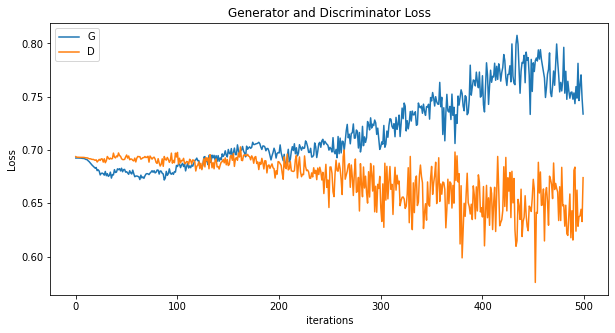

In [17]:
cgan = cGAN(out_shape=X_train.shape[1])
y_train = y_train.values.reshape(-1,1)
pos_index = np.where(y_train==1)[0]
neg_index = np.where(y_train==0)[0]
cgan.train(X_train, y_train, pos_index, neg_index, epochs=500)

In [19]:
cgan.generator.save("CGAN_tabular.h5")

In [20]:
cgan.discriminator.save("CGAN_tabular_discriminator.h5")

## Generate synthetic fake tasks via Generator network in CGAN after the training procedure

1. try to generate 1000 of data of label 0 and another of label 1

In [21]:
generated_df_0 = generate_instances(cgan,1000,0,data_columns = X_data.columns)
generated_df_1 = generate_instances(cgan,1000, 1, data_columns = X_data.columns)
traget_col = y_target.name

generated_df_0[traget_col]= 0
generated_df_1[traget_col]= 1

df_gan = pd.concat([generated_df_0, generated_df_1], ignore_index=True, sort=False)
df_gan = df_gan.sample(frac=1).reset_index(drop=True)

X_test_gen = df_gan.drop(traget_col, 1).values
y_test_gen = df_gan[traget_col].values


2. try to generate 2000 of data of label 1

In [37]:
# generated_df_0 = generate_instances(cgan,1000,0,data_columns = X_data.columns)
generated_df_1 = generate_instances(cgan,2000, 1, data_columns = X_data.columns)
traget_col = y_target.name

# generated_df_0[traget_col]= 0
generated_df_1[traget_col]= 0

df_gan = generated_df_1.copy()#pd.concat([generated_df_0, generated_df_1], ignore_index=True, sort=False)
df_gan = df_gan.sample(frac=1).reset_index(drop=True)

X_test_gen = df_gan.drop(traget_col, 1).values
y_test_gen = df_gan[traget_col].values

## Mix the generated fake tasks with the original test dataset to obtain a new test dataset

In [38]:
X_test_mixed = np.concatenate((X_test,X_test_gen))
y_test_mixed = np.concatenate((y_test,y_test_gen))
y_test_mixed

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Obtain Adaboost and RF detection performance using the new test dataset and present results in
bar chart (This step doesn’t consider Discriminator for filtering synthetic samples). Please refer
Figure 2 as test framework structure with test step index.

1. RF

In [39]:
pred_RF_mixed = RF.predict(X_test_mixed)
Accuracy_RF_mixed= accuracy_score(y_test_mixed, pred_RF_mixed)
print("Test Accuracy of RF mixed without discriminator = ",Accuracy_RF_mixed,"\n")
print(classification_report( y_test_mixed, pred_RF_mixed))

Test Accuracy of RF mixed without discriminator =  0.5897488258117215 

              precision    recall  f1-score   support

           0       1.00      0.16      0.28      2390
           1       0.56      1.00      0.71      2507

    accuracy                           0.59      4897
   macro avg       0.78      0.58      0.49      4897
weighted avg       0.77      0.59      0.50      4897



2.   AdaBoost (AB)

In [40]:
pred_ADB_mixed = AdaBoost.predict(X_test_mixed)
Accuracy_ADB_mixed = accuracy_score(y_test_mixed, pred_ADB_mixed)
print("Test Accuracy of AdaBoost mixed without discriminator = ",Accuracy_ADB_mixed,"\n")
print(classification_report( y_test_mixed ,pred_ADB_mixed))


Test Accuracy of AdaBoost mixed without discriminator =  0.5636103736981826 

              precision    recall  f1-score   support

           0       0.88      0.12      0.21      2390
           1       0.54      0.98      0.70      2507

    accuracy                           0.56      4897
   macro avg       0.71      0.55      0.46      4897
weighted avg       0.71      0.56      0.46      4897



# Verify detection performance mixed without discriminator

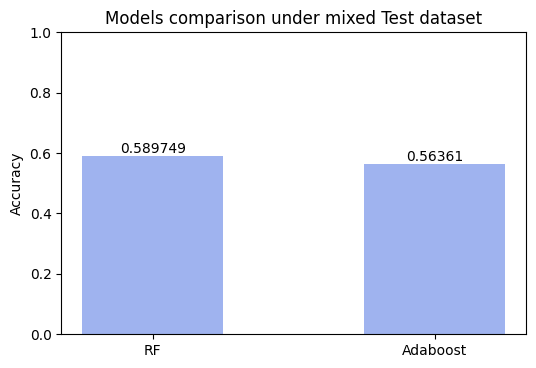

In [41]:
models_names = ['RF','Adaboost']
models_accuracies = [Accuracy_RF_mixed, Accuracy_ADB_mixed]
plt.figure(dpi=100)
bar = plt.bar(models_names ,models_accuracies, color= 'royalblue', align='center', alpha=0.5,width = 0.50)
plt.title('Models comparison under mixed Test dataset')
plt.ylabel('Accuracy')
# plt.xticks(color = 'black',rotation = 45, horizontalalignment = 'right')
plt.bar_label(bar)
plt.ylim(0,1)
plt.show()

# verify the cascade framework performance and show results in bar chart. Consider the Discriminator to as the first level classifier
and RF/Adaboost as the second level classifier

In [42]:
y_test_mixed_disc =  cgan.discriminator([X_test_mixed,y_test_mixed])
print(type(y_test_mixed_disc))
y_test_mixed_disc = y_test_mixed_disc.numpy()
y_test_mixed_disc

<class 'tensorflow.python.framework.ops.EagerTensor'>


array([[0.43224978],
       [0.5342903 ],
       [0.62712353],
       ...,
       [0.46645644],
       [0.46543413],
       [0.466351  ]], dtype=float32)

In [43]:
y_test_mixed_disc[y_test_mixed_disc>=.5] = 1
y_test_mixed_disc[y_test_mixed_disc<.5] = 0
y_test_mixed_disc = y_test_mixed_disc.astype(int)
X_test_mixed_disc = X_test_mixed[np.where(y_test_mixed_disc ==1)[0]]
y_test_mixed_disc = y_test_mixed_disc[y_test_mixed_disc==1]

In [44]:
np.unique(y_test_mixed_disc)

array([1])

1. RF

In [47]:
pred_RF_mixed_disc = RF.predict(X_test_mixed_disc)
Accuracy_RF_mixed_disc= accuracy_score(y_test_mixed_disc, pred_RF_mixed_disc)
print("Test Accuracy of RF mixed with discriminator = ",Accuracy_RF_mixed_disc,"\n")
print(classification_report( y_test_mixed_disc, pred_RF_mixed_disc))

Test Accuracy of RF mixed with discriminator =  0.8708133971291866 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.87      0.93      1463

    accuracy                           0.87      1463
   macro avg       0.50      0.44      0.47      1463
weighted avg       1.00      0.87      0.93      1463



2.   AdaBoost (AB)

In [48]:
pred_ADB_mixed_disc = AdaBoost.predict(X_test_mixed_disc)
Accuracy_ADB_mixed_disc = accuracy_score(y_test_mixed_disc, pred_ADB_mixed_disc)
print("Test Accuracy of AdaBoost mixed with discriminator = ",Accuracy_ADB_mixed_disc,"\n")
print(classification_report( y_test_mixed_disc ,pred_ADB_mixed_disc))


Test Accuracy of AdaBoost mixed with discriminator =  0.8762816131237184 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.88      0.93      1463

    accuracy                           0.88      1463
   macro avg       0.50      0.44      0.47      1463
weighted avg       1.00      0.88      0.93      1463



# Verify detection performance mixed without discriminator

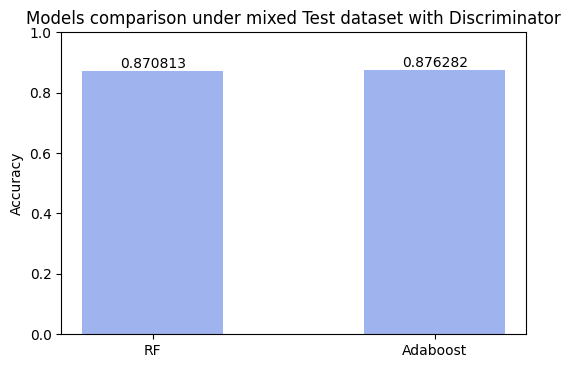

In [49]:
models_names = ['RF','Adaboost']
models_accuracies = [Accuracy_RF_mixed_disc, Accuracy_ADB_mixed_disc]
plt.figure(dpi=100)
bar = plt.bar(models_names ,models_accuracies, color= 'royalblue', align='center', alpha=0.5,width = 0.50)
plt.title('Models comparison under mixed Test dataset with Discriminator')
plt.ylabel('Accuracy')
# plt.xticks(color = 'black',rotation = 45, horizontalalignment = 'right')
plt.bar_label(bar)
plt.ylim(0,1)
plt.show()